## Scraping Data

In [45]:
import requests
import lxml.html as lh
import pandas as pd

In [46]:
# Scrape data from website 

# Looking at all NBA players of the 2022-2023 season
url='https://www.basketball-reference.com/leagues/NBA_2023_totals.html'

# Create "page" to handle the contents of website
page = requests.get(url)

# Use "document" to store contents of website
document = lh.fromstring(page.content)

# Parse data stored between </tr>'s of HTML (to scrape from HTML table)
table_elements = document.xpath('//tr')

# Perform sanity check to make sure number of columns in first 5 rows of table are the same (should be 30)
print([len(row) for row in table_elements[:5]])

# Perform sanity check on what we've scraped
print(table_elements[0].text_content())
print(table_elements[1].text_content())

[30, 30, 30, 30, 30]

         Rk
         Player
         Pos
         Age
         Tm
         G
         GS
         MP
         FG
         FGA
         FG%
         3P
         3PA
         3P%
         2P
         2PA
         2P%
         eFG%
         FT
         FTA
         FT%
         ORB
         DRB
         TRB
         AST
         STL
         BLK
         TOV
         PF
         PTS
      
1Precious AchiuwaC23TOR55121140196404.48529108.269167296.564.52187124.70210022832850313059102508


In [47]:
# Write data to a dataframe 

# Create a list called table that will hold all our data
table = []

# ColNum will keep track of which column in the table we are looking at
colNum = 0

# For each column, store the first element (titles of the columns) and an empty list in "table"
for firstRow in table_elements[0]:
    colNum += 1
    name = firstRow.text_content()
    print('%d:"%s"' % (colNum, name))  # print column index and title of column for a sanity check
    table.append((name, []))

# Since first row is the header, data is stored on the second row onwards
for rowNum in range(1, len(table_elements)):

    thisRow = table_elements[rowNum]  # thisRow stores all columns in current row
    
    # Ensures that rows have 30 columns (writing defensible code)
    if len(thisRow) != 30:
        break

    colNum = 0  # colNum keeps track of column as we traverse this row

    # Iterate through each element of current row
    for elem in thisRow:
        data = elem.text_content()
        try: # processing enrollment data 
            data = int(data)
        except:
            pass
        table[colNum][1].append(data)  # Append the data to the list of this current column
        colNum += 1  # Increment i for the next column

print(table)

1:"Rk"
2:"Player"
3:"Pos"
4:"Age"
5:"Tm"
6:"G"
7:"GS"
8:"MP"
9:"FG"
10:"FGA"
11:"FG%"
12:"3P"
13:"3PA"
14:"3P%"
15:"2P"
16:"2PA"
17:"2P%"
18:"eFG%"
19:"FT"
20:"FTA"
21:"FT%"
22:"ORB"
23:"DRB"
24:"TRB"
25:"AST"
26:"STL"
27:"BLK"
28:"TOV"
29:"PF"
30:"PTS"
[('Rk', [1, 2, 3, 4, 5, 6, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 15, 16, 17, 18, 19, 20, 'Rk', 21, 22, 22, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 30, 31, 32, 33, 34, 34, 34, 35, 36, 36, 36, 37, 38, 39, 39, 39, 40, 40, 40, 'Rk', 41, 42, 42, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 53, 53, 54, 55, 56, 57, 58, 58, 58, 59, 60, 'Rk', 61, 62, 63, 64, 65, 66, 66, 66, 67, 68, 69, 70, 70, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 'Rk', 81, 82, 83, 84, 85, 86, 87, 87, 87, 88, 88, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 99, 99, 100, 'Rk', 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 115, 115, 116, 117, 118, 119, 120, 'Rk', 121, 122, 123, 123, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 132

In [48]:
# Convert table to pandas data frame
Dict = {title: column for (title, column) in table}
df = pd.DataFrame(Dict)

df.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,.750,85,286,371,97,45,48,60,143,696
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,131,295,...,.667,15,86,101,108,32,21,55,88,363
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,528,83,170,...,.692,8,51,59,76,24,14,45,58,228
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,356,48,125,...,.619,7,35,42,32,8,7,10,30,135
8,7,Grayson Allen,SG,27,MIL,72,70,1972,245,557,...,.905,61,176,237,163,62,14,72,117,750
9,8,Jarrett Allen,C,24,CLE,68,68,2220,403,626,...,.733,221,445,666,113,54,84,93,153,969


In [49]:
# Remove rows that repeat the same player (occur when players switch teams)
result = df.drop_duplicates(subset=['Player'], keep='first')

# Remove invalid rows
result = result[result.Player != "Player"]

# Remove rank column which is alphabetically based on last name
result = result.drop('Rk', axis=1)

result.head(30)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,.485,...,.702,100,228,328,50,31,30,59,102,508
1,Steven Adams,C,29,MEM,42,42,1133,157,263,.597,...,.364,214,271,485,97,36,46,79,98,361
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,.540,...,.806,184,504,688,240,88,61,187,208,1529
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,.427,...,.812,43,78,121,67,16,15,41,99,467
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,.470,...,.750,85,286,371,97,45,48,60,143,696
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,131,295,.444,...,.667,15,86,101,108,32,21,55,88,363
8,Grayson Allen,SG,27,MIL,72,70,1972,245,557,.440,...,.905,61,176,237,163,62,14,72,117,750
9,Jarrett Allen,C,24,CLE,68,68,2220,403,626,.644,...,.733,221,445,666,113,54,84,93,153,969
10,Jose Alvarado,PG,24,NOP,61,10,1310,201,489,.411,...,.813,28,113,141,186,67,10,81,125,550
11,Kyle Anderson,PF,29,MIN,69,46,1957,252,495,.509,...,.735,66,302,368,335,78,63,103,146,647


In [50]:
# write output to file
!mkdir data
result.to_csv("data/nba_22_33_player_raw_data.csv", index=False)

mkdir: cannot create directory ‘data’: File exists


## Processing Data

In [51]:
# Load in file and rename columns 
dataTable = pd.read_csv("data/nba_22_33_player_raw_data.csv") # read in raw data file
dataTable.head(23)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,0.702,100,228,328,50,31,30,59,102,508
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,0.364,214,271,485,97,36,46,79,98,361
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,0.806,184,504,688,240,88,61,187,208,1529
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,0.812,43,78,121,67,16,15,41,99,467
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,0.750,85,286,371,97,45,48,60,143,696
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,131,295,0.444,...,0.667,15,86,101,108,32,21,55,88,363
6,Grayson Allen,SG,27,MIL,72,70,1972,245,557,0.440,...,0.905,61,176,237,163,62,14,72,117,750
7,Jarrett Allen,C,24,CLE,68,68,2220,403,626,0.644,...,0.733,221,445,666,113,54,84,93,153,969
8,Jose Alvarado,PG,24,NOP,61,10,1310,201,489,0.411,...,0.813,28,113,141,186,67,10,81,125,550
9,Kyle Anderson,PF,29,MIN,69,46,1957,252,495,0.509,...,0.735,66,302,368,335,78,63,103,146,647


In [52]:
# Aggregating data based on positions to determine positions that score the most points

pos_pts = dataTable[['Pos', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'PTS']]
pos_pts = pos_pts.sort_values('Pos')

# display different positions
print(pos_pts.Pos.unique())

# remove rows with outlier positions
pos_pts = pos_pts[pos_pts['Pos'].map(len) < 3]

# sum values based on position
pos_pts = pos_pts.groupby('Pos', as_index = False).sum()

# sort rows based on total points
pos_pts = pos_pts.sort_values('PTS', ascending = False);

# determine which positions have been shooting the most points this season
pos_pts

['C' 'PF' 'PF-SF' 'PG' 'SF' 'SF-SG' 'SG' 'SG-PG']


,Pos,FG,FGA,3P,3PA,2P,2PA,FT,FTA,PTS
4,SG,25635,57110,9704,26183,15931,30927,10142,12611,71116
2,PG,20655,46206,6902,19298,13753,26908,10123,12308,58335
0,C,19601,34525,2146,6147,17455,28378,9062,12514,50410
3,SF,17857,38873,6248,17203,11609,21670,7525,9329,49487
1,PF,18279,38071,5039,14464,13240,23607,7848,10473,49445


In [53]:
# Calculate field goal %, 3 point %, 2 point %, and free throw % based on totals and add to dataframe

pos_pts["FG%"] = pos_pts['FG']/pos_pts['FGA']
pos_pts["3P%"] = pos_pts['3P']/pos_pts['3PA']
pos_pts["2P%"] = pos_pts['2P']/pos_pts['2PA']
pos_pts["FTP%"] = pos_pts['FT']/pos_pts['FTA']

# Determine what type of shot each position is best at shooting
pos_pts.to_csv("data/pos_pts_data.csv", index=False)
pos_pts

,Pos,FG,FGA,3P,3PA,2P,2PA,FT,FTA,PTS,FG%,3P%,2P%,FTP%
4,SG,25635,57110,9704,26183,15931,30927,10142,12611,71116,0.448871,0.370622,0.515116,0.804219
2,PG,20655,46206,6902,19298,13753,26908,10123,12308,58335,0.447020,0.357654,0.511112,0.822473
0,C,19601,34525,2146,6147,17455,28378,9062,12514,50410,0.567734,0.349113,0.615089,0.724149
3,SF,17857,38873,6248,17203,11609,21670,7525,9329,49487,0.459368,0.363192,0.535718,0.806625
1,PF,18279,38071,5039,14464,13240,23607,7848,10473,49445,0.480129,0.348382,0.560851,0.749355


{23: 64, 24: 53, 25: 52, 22: 47, 21: 41, 26: 39, 27: 38, 20: 30, 30: 29, 28: 26, 29: 26, 32: 19, 31: 16, 34: 15, 19: 14, 33: 11, 36: 8, 35: 5, 37: 3, 38: 1, 39: 1, 42: 1}


,Age,FG,FGA,3P,3PA,2P,2PA,FT,FTA,PTS,CNT,PTS/Player
19,38,609,1219,121,377,488,842,251,327,1590,1,1590.000000
9,28,7074,14918,1970,5513,5104,9405,3729,4844,19847,26,763.346154
13,32,4863,10319,1620,4365,3243,5954,1980,2419,13326,19,701.368421
14,33,2546,5329,636,1736,1910,3593,1664,1954,7392,11,672.000000
7,26,9195,19126,2871,7733,6324,11393,3604,4502,24865,39,637.564103
8,27,8285,17090,2393,6626,5892,10464,3518,4540,22481,38,591.605263
15,34,3195,6650,1105,2976,2090,3674,1334,1661,8829,15,588.600000
11,30,6105,12644,2021,5334,4084,7310,2468,3114,16699,29,575.827586
5,24,10935,22576,2982,8235,7953,14341,5172,6490,30024,53,566.490566
12,31,3146,6795,1304,3331,1842,3464,1252,1569,8848,16,553.000000


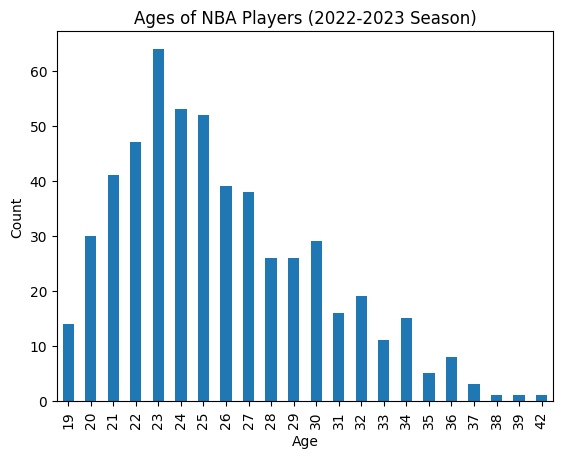

In [54]:
# Aggregating data based on age to determine if age affects points scored

age_pts = dataTable[['Age', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'PTS']]
age_pts = age_pts.sort_values('Age')

# display different ages in a bar graph
age_list = dict(age_pts['Age'].value_counts());
print(age_list)
age_pts['Age'].value_counts().sort_index().plot(kind='bar', title = "Ages of NBA Players (2022-2023 Season)", xlabel = "Age", ylabel = "Count")

# sum values based on age
age_pts = age_pts.groupby('Age', as_index = False).sum()

# add column of age counts and average points per player to dataframe
age_pts['CNT'] = age_pts['Age'].map(age_list)
age_pts['PTS/Player'] = age_pts['PTS']/age_pts['CNT']

# sort rows based on average points per player
age_pts = age_pts.sort_values('PTS/Player', ascending = False);

# add column for average points scored per player
age_pts

# determine what age has been shooting the most points this season
age_pts

In [55]:
# Calculate field goal %, 3 point %, 2 point %, and free throw % based on totals and add to dataframe

age_pts["FG%"] = age_pts['FG']/age_pts['FGA']
age_pts["3P%"] = age_pts['3P']/age_pts['3PA']
age_pts["2P%"] = age_pts['2P']/age_pts['2PA']
age_pts["FTP%"] = age_pts['FT']/age_pts['FTA']

# Determine what type of shot each age is best at shooting
age_pts.to_csv("data/age_pts_data.csv", index=False)
age_pts

,Age,FG,FGA,3P,3PA,2P,2PA,FT,FTA,PTS,CNT,PTS/Player,FG%,3P%,2P%,FTP%
19,38,609,1219,121,377,488,842,251,327,1590,1,1590.000000,0.499590,0.320955,0.579572,0.767584
9,28,7074,14918,1970,5513,5104,9405,3729,4844,19847,26,763.346154,0.474192,0.357337,0.542690,0.769818
13,32,4863,10319,1620,4365,3243,5954,1980,2419,13326,19,701.368421,0.471267,0.371134,0.544676,0.818520
14,33,2546,5329,636,1736,1910,3593,1664,1954,7392,11,672.000000,0.477763,0.366359,0.531589,0.851586
7,26,9195,19126,2871,7733,6324,11393,3604,4502,24865,39,637.564103,0.480759,0.371266,0.555078,0.800533
8,27,8285,17090,2393,6626,5892,10464,3518,4540,22481,38,591.605263,0.484786,0.361153,0.563073,0.774890
15,34,3195,6650,1105,2976,2090,3674,1334,1661,8829,15,588.600000,0.480451,0.371304,0.568862,0.803131
11,30,6105,12644,2021,5334,4084,7310,2468,3114,16699,29,575.827586,0.482838,0.378890,0.558687,0.792550
5,24,10935,22576,2982,8235,7953,14341,5172,6490,30024,53,566.490566,0.484364,0.362113,0.554564,0.796918
12,31,3146,6795,1304,3331,1842,3464,1252,1569,8848,16,553.000000,0.462987,0.391474,0.531755,0.797960


In [56]:
# Identify which player has the highest points per game average

ppg = dataTable[['Player', 'Tm', 'G', 'PTS']]
ppg['PPG'] = ppg['PTS']/ppg['G']
ppg = ppg.sort_values('PPG', ascending=False)
ppg.to_csv("data/ppg_data.csv", index=False)
ppg.head(10)

<ipython-input-56-f907328c0839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppg['PPG'] = ppg['PTS']/ppg['G']


,Player,Tm,G,PTS,PPG
142,Joel Embiid,PHI,66,2183,33.075758
124,Luka Dončić,DAL,66,2138,32.393939
291,Damian Lillard,POR,58,1866,32.172414
163,Shai Gilgeous-Alexander,OKC,68,2135,31.397059
10,Giannis Antetokounmpo,MIL,63,1959,31.095238
464,Jayson Tatum,BOS,74,2225,30.067568
107,Stephen Curry,GSW,56,1648,29.428571
136,Kevin Durant,TOT,47,1366,29.063830
238,LeBron James,LAL,55,1590,28.909091
337,Donovan Mitchell,CLE,68,1922,28.264706


In [57]:
# Aggregate data by teams

teams = dataTable[['Tm', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
teams = teams.sort_values('Tm')

# sum values based on team
teams = teams.groupby('Tm', as_index = False).sum()

# calculate shot percentages
teams.insert(3, "FG%", teams['FG']/teams['FGA'], allow_duplicates=True)
teams.insert(6, "3P%", teams['3P']/teams['3PA'], allow_duplicates=True)
teams.insert(9, "2P%", teams['2P']/teams['2PA'], allow_duplicates=True)
teams.insert(12, "FTP%", teams['FT']/teams['FTA'], allow_duplicates=True)

teams.to_csv("data/teams_data.csv", index=False)
teams

,Tm,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FTP%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,3453,7125,0.484632,781,2242,0.348350,2672,4883,0.547205,...,0.816713,869,2565,3434,1965,549,385,969,1434,9153
1,BOS,3416,7177,0.475965,1289,3422,0.376680,2127,3755,0.566445,...,0.812642,780,2865,3645,2171,516,425,1034,1513,9548
2,BRK,1845,3731,0.494505,599,1505,0.398007,1246,2226,0.559748,...,0.715090,487,1724,2211,1198,370,353,630,1202,4924
3,CHI,3305,6688,0.494169,783,2157,0.363004,2522,4531,0.556610,...,0.815972,656,2633,3289,1791,610,350,968,1423,8803
4,CHO,2828,6362,0.444514,780,2378,0.328007,2048,3984,0.514056,...,0.767381,655,2140,2795,1694,519,357,932,1320,7617
5,CLE,3278,6661,0.492118,868,2365,0.367019,2410,4296,0.560987,...,0.776404,751,2328,3079,1965,574,374,966,1485,8806
6,DAL,2578,5366,0.480432,939,2553,0.367803,1639,2813,0.582652,...,0.740000,509,2157,2666,1398,395,247,777,1381,7353
7,DEN,3294,6378,0.516463,839,2197,0.381884,2455,4181,0.587180,...,0.745593,787,2511,3298,2172,566,343,1018,1376,8696
8,DET,2664,5823,0.457496,746,2109,0.353722,1918,3714,0.516424,...,0.765360,745,2047,2792,1725,468,247,1019,1485,7382
9,GSW,3462,7271,0.476138,1358,3529,0.384812,2104,3742,0.562266,...,0.796778,832,2722,3554,2424,579,312,1269,1704,9568


##Data Viz

In [58]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [28]:
%%R
install.packages("ggrepel")

In [29]:
%%R 
library('tidyverse') 
library('ggrepel')
df <- read_csv('data/nba_22_33_player_raw_data.csv')
df

Rows: 539 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player, Pos, Tm
dbl (26): Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 539 × 29
   Player      Pos     Age Tm        G    GS    MP    FG   FGA `FG%`  `3P` `3PA`
   <chr>       <chr> <dbl> <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Precious A… C        23 TOR      55    12  1140   196   404 0.485    29   108
 2 Steven Ada… C        29 MEM      42    42  1133   157   263 0.597     0     1
 3 Bam Adebayo C        25 MIA      75    75  2598   602  1114 0.54      1    12
 4 Ochai Agba… SG       22 UTA      59    22  1209   165   386 0.427    81   228
 5 Santi Alda… PF       22 MEM      77    20  1682   247   525 0.47     94   266
 6 Nickeil Al… SG       24 TOT   

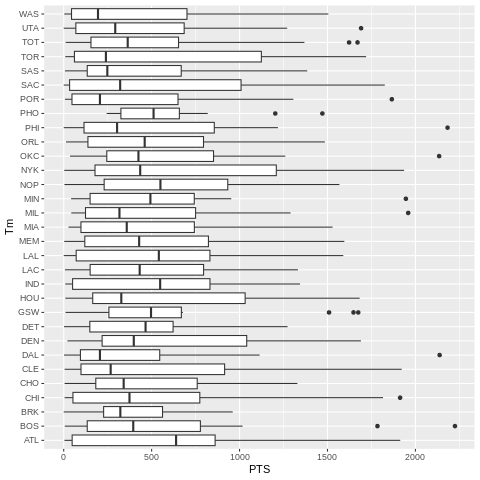

In [30]:
%%R 
# examining points scored by players on team
ggplot(df, aes(x=PTS, y=Tm)) + geom_boxplot()

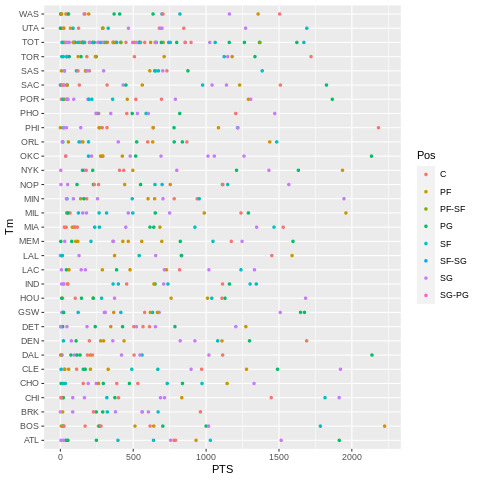

In [33]:
# examining which positions scored the most points per team
%%R
ggplot(df, aes(y=Tm, x=PTS, color = Pos)) + geom_point(size=1)

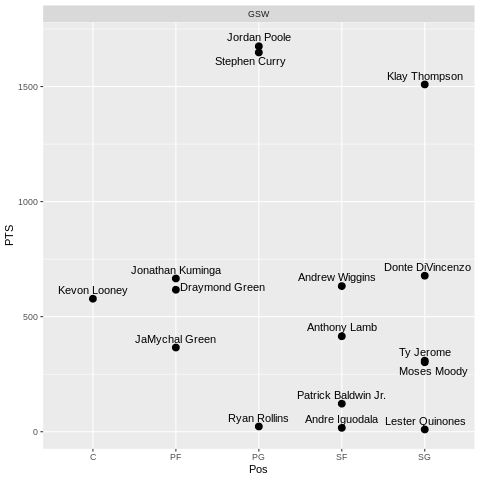

In [69]:
# examining points scored by Warriors players
%%R 
gsw_points <- df %>% filter(Tm == "GSW")
ggplot(gsw_points, aes(x=Pos, y=PTS)) + geom_point(size=3) + geom_text_repel(aes(label = Player), nudge_y=20) + facet_wrap(~ Tm)

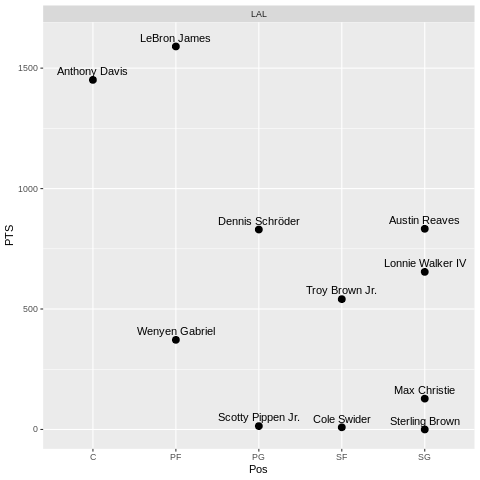

In [70]:
# examining points scored by Lakers players
%%R 
gsw_points <- df %>% filter(Tm == "LAL")
ggplot(gsw_points, aes(x=Pos, y=PTS)) + geom_point(size=3) + geom_text_repel(aes(label = Player), nudge_y=20) + facet_wrap(~ Tm)

#Statistical Analysis

In [36]:
import sklearn
import scipy
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

df = pd.read_csv("data/nba_22_33_player_raw_data.csv") # read in raw data file
df = df.fillna(0)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,0.702,100,228,328,50,31,30,59,102,508
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,0.364,214,271,485,97,36,46,79,98,361
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,0.806,184,504,688,240,88,61,187,208,1529
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,0.812,43,78,121,67,16,15,41,99,467
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,0.750,85,286,371,97,45,48,60,143,696


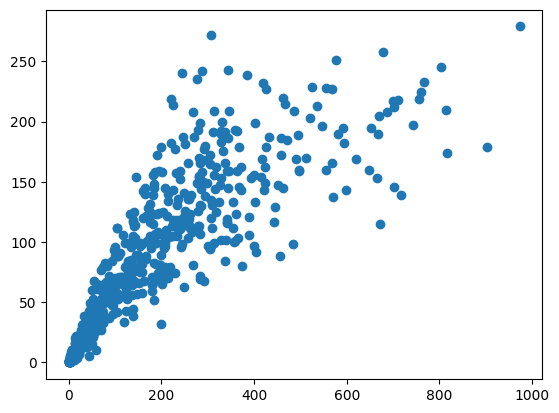

In [37]:
# plotting total rebounds vs personal fouls to determine if there is a correlation, may be able to show how aggressive a player is
plt.scatter(df['TRB'], df['PF'])
plt.show()

In [38]:
# Determine correlation between total rebounds and personal fouls
print('Pearson coeff: ' + str(round(scipy.stats.pearsonr(df['TRB'], df['PF'])[0], 3)))
print('Spearman coeff: ' + str(round(scipy.stats.spearmanr(df['TRB'], df['PF'])[0], 3)))

Pearson coeff: 0.837
Spearman coeff: 0.918


#K-Means Clustering

In [39]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df[['TRB', 'PTS']])
df['label'] = label
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,label
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,100,228,328,50,31,30,59,102,508,2
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,214,271,485,97,36,46,79,98,361,2
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,184,504,688,240,88,61,187,208,1529,1
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,43,78,121,67,16,15,41,99,467,2
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,85,286,371,97,45,48,60,143,696,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Thaddeus Young,PF,34,TOR,54,9,795,108,198,0.545,...,71,95,166,75,54,5,42,88,240,0
535,Trae Young,PG,24,ATL,73,73,2541,597,1390,0.429,...,56,161,217,741,80,9,300,104,1914,1
536,Omer Yurtseven,C,24,MIA,9,0,83,16,27,0.593,...,8,15,23,2,2,2,4,16,40,0
537,Cody Zeller,C,30,MIA,15,2,217,37,59,0.627,...,25,39,64,10,3,4,14,33,98,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

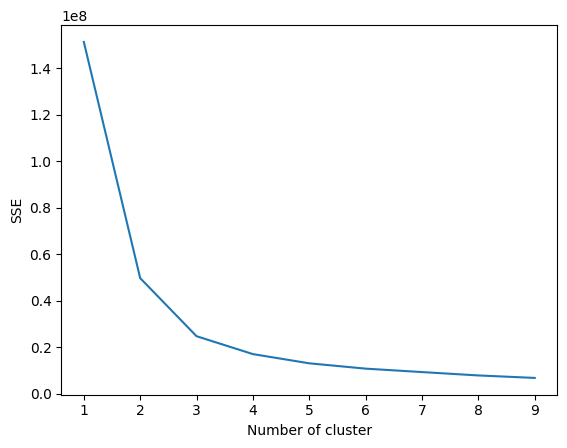

In [40]:
# try to find optimal k 
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df[['TRB', 'PTS']])
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

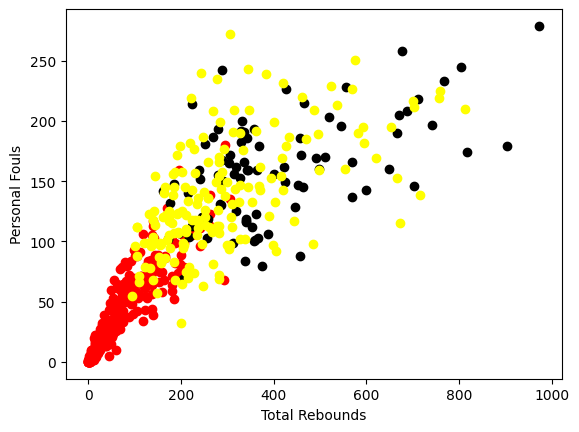

In [41]:
# k should be 3 based on elbow method

#filter rows of original data
filtered_label0 = df[label == 0][['Player', 'Pos', 'Tm', 'TRB', 'PF', 'PTS']]
filtered_label1 = df[label == 1][['Player', 'Pos', 'Tm', 'TRB', 'PF', 'PTS']]
filtered_label2 = df[label == 2][['Player', 'Pos', 'Tm', 'TRB', 'PF', 'PTS']]

filtered_label0 = filtered_label0.sort_values('PTS', ascending=False)
filtered_label1 = filtered_label1.sort_values('PTS', ascending=False)
filtered_label2 = filtered_label2.sort_values('PTS', ascending=False)

#Plotting the results
plt.scatter(filtered_label0['TRB'] , filtered_label0['PF'] , color = 'red')
plt.scatter(filtered_label1['TRB'] , filtered_label1['PF'] , color = 'black')
plt.scatter(filtered_label2['TRB'] , filtered_label2['PF'] , color = 'yellow')
plt.xlabel('Total Rebounds')
plt.ylabel('Personal Fouls')
plt.show()

In [42]:
print(filtered_label0.head(100))
print(filtered_label0.mean())

               Player Pos   Tm  TRB   PF  PTS
257       Cory Joseph  PG  DET  106   88  427
190       Jaden Hardy  SG  DAL   89   64  420
193       Gary Harris  SG  ORL   98   93  397
406       Cam Reddish  SF  TOT   88   72  387
496         John Wall  PG  LAC   92   59  386
..                ...  ..  ...  ...  ...  ...
505      Blake Wesley  SG  SAS   81   67  184
326   Rodney McGruder  SG  DET   74   39  183
271  Christian Koloko   C  TOR  171  128  182
158        Luka Garza   C  MIN   63   43  181
314   Wesley Matthews  SG  MIL  113   71  179

[100 rows x 6 columns]
TRB     70.952727
PF      40.374545
PTS    141.440000
dtype: float64


<ipython-input-42-65f3745a44e3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(filtered_label0.mean())


In [43]:
print(filtered_label1.head(100))
print(filtered_label1.mean())

                      Player Pos   Tm  TRB   PF   PTS
464             Jayson Tatum  PF  BOS  649  160  2225
142              Joel Embiid   C  PHI  670  205  2183
124              Luka Dončić  PG  DAL  569  166  2138
163  Shai Gilgeous-Alexander  PG  OKC  329  192  2135
10     Giannis Antetokounmpo  PF  MIL  742  197  1959
..                       ...  ..  ...  ...  ...   ...
196            Tobias Harris  PF  PHI  424  149  1085
389       Michael Porter Jr.  SF  DEN  341  119  1080
39                Saddiq Bey  SF  TOT  362  123  1062
517           Jalen Williams  SG  OKC  337  191  1056
310        Kenyon Martin Jr.  SF  HOU  452  147  1039

[89 rows x 6 columns]
TRB     404.033708
PF      157.730337
PTS    1429.831461
dtype: float64


<ipython-input-43-7e7bdd369749>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(filtered_label1.mean())


In [44]:
print(filtered_label2.head(100))
print(filtered_label2.mean())

              Player Pos   Tm  TRB   PF   PTS
60     Dillon Brooks  SF  MEM  244  240  1047
341       Malik Monk  SG  SAC  203  125  1041
223  De'Andre Hunter  SF  ATL  284  199  1029
35     Malik Beasley  SG  TOT  283  107  1025
395    Norman Powell  SG  LAC  175  125  1019
..               ...  ..  ...  ...  ...   ...
181       AJ Griffin  SF  ATL  153   87   639
333     Shake Milton  SG  PHI  191  123   637
359    Georges Niang  PF  PHI  185  145   637
348     Monte Morris  PG  WAS  210   75   636
46           Bol Bol  PF  ORL  405   92   634

[100 rows x 6 columns]
TRB    293.640000
PF     137.188571
PTS    662.720000
dtype: float64


<ipython-input-44-e214361806f6>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(filtered_label2.mean())


#Interpretation

Based on K-means clustering with 3 clusters, analyzing total rebounds and personal fouls and 

**Group 1: Less rebounds and less fouls**\
Notable Players:
* Cory Joseph (DET)
* Jaden Hardy (DAL)
* Gary Harris (ORL)

**Group 2: More rebounds and less fouls**\
Notable Players:
* Jason Tatum (BOS)
* Joel Embiid (PHI)
* Luka Doncic (DAL)

**Group 2: More rebounds and more fouls**\
Notable Players:
* Dillon Brooks (MEM)
* Malik Monk (SAC)
* De'Andre Hunter (ATL)